In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn import model_selection

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn.svm import SVC

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [11]:
names = ['sepal_length','sepal_width','petal_length','petal_width','class']

In [12]:
dataset = pd.read_csv(url,names=names)

In [13]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [14]:
dataset.shape

(150, 5)

In [15]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [16]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

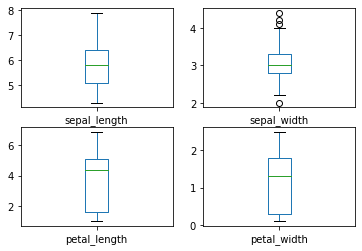

In [18]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False) #univariate plot

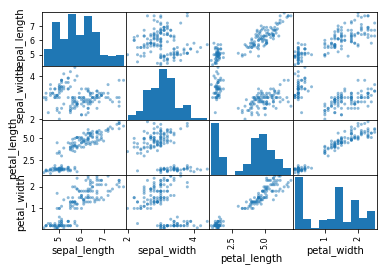

In [19]:
scatter_matrix(dataset) #multivariate plot
plt.show()

In [25]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

random_state = 6
scoring = 'accuracy'

In [26]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=random_state)

In [27]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [30]:
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=random_state, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)"  %(name, cv_results.mean(), cv_results.std())
    print(msg)

/home/subbo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/subbo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)
